In [154]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

In [155]:
data = pd.read_csv('data/events1.csv')
data.head()

,case_id,timestamp,activity,duration,attributes
0,cng.edu,2022-02-09,user_session,0,"['traffic_source:google.com','traffic_medium:o..."
1,cng.edu,2021-11-29,contact created,0,['contact_job_title:Director of Technology and...
2,cng.edu,2021-11-30,disco_call_book,-2,"['desired_job_title','call_booked_by_contact_j..."
3,cng.edu,2021-11-29,lead_created,-3,[]
4,cng.edu,2021-11-29,user_session,0,"['traffic_source:google.com','traffic_medium:o..."


In [156]:
# Rename the columns
data = data.rename(columns={
    'case_id': 'case_id',
    'tupleElement(event_tuple, 1)': 'timestamp',
    'tupleElement(event_tuple, 2)': 'activity',
    'tupleElement(event_tuple, 3)': 'duration',
    'tupleElement(event_tuple, 4)': 'attributes'
})

In [157]:
data['timestamp'] = pd.to_datetime(data['timestamp'])  # Convert 'timestamp' column to datetime format
df = data.sort_values(by=['case_id', 'timestamp'])  # Sorting by 'case_id' and 'timestamp'

In [158]:
unique_cases = data['case_id'].nunique()
print("Number of unique values in the column 'case_id':", unique_cases)


Number of unique values in the column 'case_id': 3246


In [159]:
data.head()

,case_id,timestamp,activity,duration,attributes
0,cng.edu,2022-02-09,user_session,0,"['traffic_source:google.com','traffic_medium:o..."
1,cng.edu,2021-11-29,contact created,0,['contact_job_title:Director of Technology and...
2,cng.edu,2021-11-30,disco_call_book,-2,"['desired_job_title','call_booked_by_contact_j..."
3,cng.edu,2021-11-29,lead_created,-3,[]
4,cng.edu,2021-11-29,user_session,0,"['traffic_source:google.com','traffic_medium:o..."


In [160]:
data['time_diff'] = data.groupby('case_id')['timestamp'].diff().dt.days  # Calculating the difference in days between neighboring events in each process

# Identifying the most vulnerable process
process_duration = data.groupby('activity')['time_diff'].sum()  # Summarizing the time difference for each process
most_vulnerable_process = process_duration.idxmax()  # Identification of the process with the longest duration

In [161]:
data.head()

,case_id,timestamp,activity,duration,attributes,time_diff
0,cng.edu,2022-02-09,user_session,0,"['traffic_source:google.com','traffic_medium:o...",NaN
1,cng.edu,2021-11-29,contact created,0,['contact_job_title:Director of Technology and...,-72.0
2,cng.edu,2021-11-30,disco_call_book,-2,"['desired_job_title','call_booked_by_contact_j...",1.0
3,cng.edu,2021-11-29,lead_created,-3,[],-1.0
4,cng.edu,2021-11-29,user_session,0,"['traffic_source:google.com','traffic_medium:o...",0.0


In [162]:
#data.to_csv('data/events1.csv', index=False)

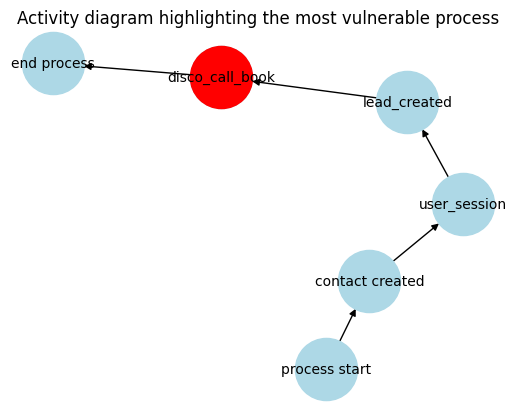

In [164]:
# Graph creation
G = nx.DiGraph()
G.add_edges_from([
    ('process start', 'contact created'),
    ('contact created', 'user_session'),
    ('user_session', 'lead_created'),
    ('lead_created', 'disco_call_book'),
    ('disco_call_book', 'end process')
])

# Identifying the most vulnerable process
most_vulnerable_process = 'disco_call_book'

# Defining node positions for visualization
pos = nx.spring_layout(G)

# Graph display
nx.draw_networkx(G, pos, with_labels=True, node_color='lightblue', node_size=2000, font_size=10)

# Highlighting the most vulnerable process
nx.draw_networkx_nodes(G, pos, nodelist=[most_vulnerable_process], node_color='red', node_size=2000)

# Customizing the appearance of the graph
plt.title("Activity diagram highlighting the most vulnerable process")
plt.axis('off')

# Graph display
plt.show()
